# Tâche 9:  vitesse du son dans la zone de Brillouin

In [74]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.io.cif import CifWriter
from pymatgen import Spin
from pymatgen.phonon.plotter import *
from pymatgen.phonon.bandstructure import *
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter

import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
with MPRester("WOCEDvyZTdTuSHXq") as m:
    bandStructure = m.get_phonon_bandstructure_by_material_id("mp-15988")
    
print(" Le matériau à analyser est le Li2CuSb")

 Le matériau à analyser est le Li2CuSb


## 1) plot de la structure de bande des phonons et la zone de Brillouin 

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

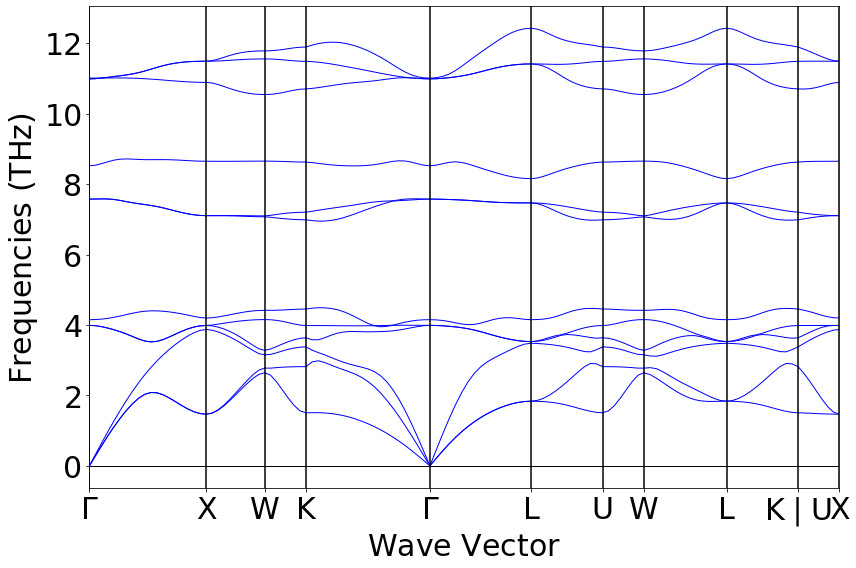

In [10]:
PhononBSPlotter(bandStructure).get_plot()

Le graphe ci-dessus représente les courbes de dispertion du Li2cuSb

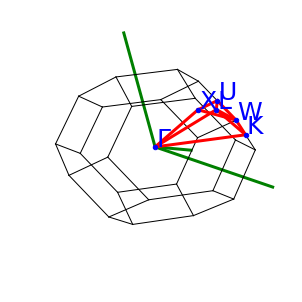

In [12]:
PhononBSPlotter(bandStructure).plot_brillouin()

Le graphique ci-dessus représente la zone de Brillouin du Li2CuSb

## 2) Vitesse du son pour les branches acoustiques dans la zone de Brillouin

In [17]:
# De la même manière que dans le jupiter notebook el_bands,
#    on stocke les données

data = PhononBSPlotter(bandStructure).bs_plot_data()
distances = data.get('distances')
frequency = data.get('frequency')

Soient
 - la vitesse angulaire $\Omega = 2*Pi*fréquence$ est la relation de dispersion
 - q le vecteur d'onde q
 
La vitesse du son est donnée par la relation $\frac{\partial \Omega}{\partial q}$

Avec la longueur d'onde $\lambda$ >> paramètre de maille a 



In [18]:
def pentenegative(distance, freq):
    """
    Cette fonction permet de calculer la pente entre deux points voisins
        sur l'échantillon de la structure de bande des phonons lorsque la 
        pente est négative.
     
    """
    # les facteurs 10**12 et 10**(-10) correspondent respectivement au 
    #      changement d'unité (hz et m)
    pente = ((abs(freq[-1]-freq[0])*10**12*10**(-10)*(2*np.pi))/(distance[-1]-distance[0])) #[m/s]
    return pente 

def pentepositive(distance, freq):
    """
    Cette fonction permet de calculer la pente entre deux points voisins
        sur l'échantillon de la structure de bande des phonons lorsque la 
        pente est positive.
     
    """
    # les facteurs 10**12 et 10**(-10) correspondent respectivement au 
    #      changement d'unité (hz et m)
    pente = ((abs(freq[0]-freq[1])*10**12*10**(-10)*(2*np.pi))/(distance[1]-distance[0])) #[m/s]
    return pente

In [72]:
vitesse1 = 2*np.pi*pentepositive(distances[0],frequency[0][0])
vitesse2 = 2*np.pi*pentenegative(distances[3],frequency[3][1])
vitesse3 = 2*np.pi*pentepositive(distances[4],frequency[4][2])
print("Les vitesses du son des courbes 1, 2 et 3 , \n dans les directions Γ-X, K-Γ et Γ-L, sont \n", vitesse1, "[m/s] ," , vitesse2 , "[m/s]", "et", vitesse3, "[m/s]")


Les vitesses du son des courbes 1, 2 et 3 , 
 dans les directions Γ-X, K-Γ et Γ-L, sont 
 21707.31368673157 [m/s] , 10417.923718599102 [m/s] et 32732.101384351503 [m/s]


## 3) Représentation graphique des vitesses 

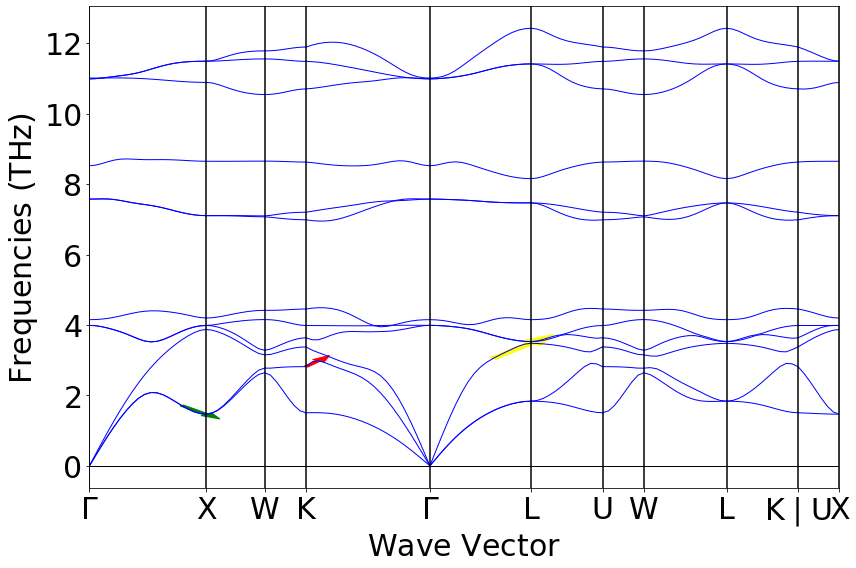

In [73]:
PhononBSPlotter(bandStructure).get_plot()

plt.arrow(distances[0][15],frequency[0][0][15],distances[0][-1]-distances[0][15],frequency[0][0][-1]-frequency[0][0][15], color='green',width = 0.04)

plt.arrow(distances[3][0],frequency[3][1][0],distances[3][2]-distances[3][0],frequency[3][1][2]-frequency[3][1][0], color='red',width = 0.04)

plt.arrow(distances[4][10],frequency[4][2][10],distances[4][-1]-distances[4][10],frequency[4][2][-1]-frequency[4][2][10], color='yellow',width = 0.07)


- la vitesse 1 est représentée en vert
- la vitesse 2 est représentée en rouge
- la vitesse 3 est représentée en jaune
